# EDA process

The objective of this EDA is to prepare the data for the machine learning process. We are building a model which makes recommendations based on user id

Import the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the files

In [4]:
df_reviews = pd.read_csv(r'Datasets\user_reviews_clean.csv')
df_items = pd.read_csv(r'Datasets\user_items_clean.csv')
df_games = pd.read_csv(r'Datasets\steam_games_clean.csv')

## EDA for df_games

First, we look to a brief summary of the dataset

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     85578 non-null  object 
 1   release_date  85625 non-null  object 
 2   price         85625 non-null  object 
 3   early_access  85625 non-null  float64
 4   id            85625 non-null  float64
 5   developer     85625 non-null  object 
 6   genre         85625 non-null  object 
 7   app_title     85625 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.2+ MB


In [8]:
df_games.describe(include='all') 

,publisher,release_date,price,early_access,id,developer,genre,app_title
count,85578,85625,85625,85625.000000,8.562500e+04,85625,85625,85625
unique,8237,3583,163,NaN,NaN,10993,304,32094
top,No data,No data,4.99,NaN,NaN,No data,Indie,HORROR OF THE DEEP
freq,26140,10698,10971,NaN,NaN,14054,17137,20
mean,NaN,NaN,NaN,0.104128,4.735768e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,0.305429,1.695506e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,1.000000e+01,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,3.552500e+05,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,4.763600e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.000000,6.046000e+05,NaN,NaN,NaN


Let's see the most repeated in the column genre. We are using only the top 25 since the are a lot of distinct genres

In [32]:
unique_genres = df_games['genre'].nunique()
print(unique_genres)

304


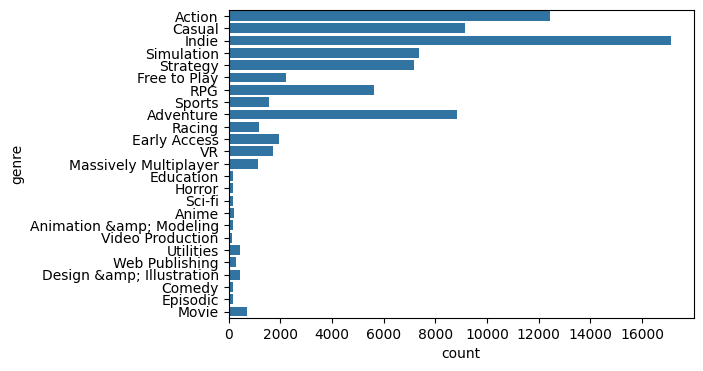

In [55]:
top_genres = df_games['genre'].value_counts().head(25).index
df_top_genres = df_games[df_games['genre'].isin(top_genres)]
plt.figure(figsize=(6, 4))
sns.countplot(data=df_top_genres, y='genre', orient='v')
plt.show()

Same with year,  publisher and developer

In [ ]:
df_games['year'] = df_games['release_date'].str.extract(r'(\d{4})')
df_games.drop(columns=['release_date'], inplace=True)

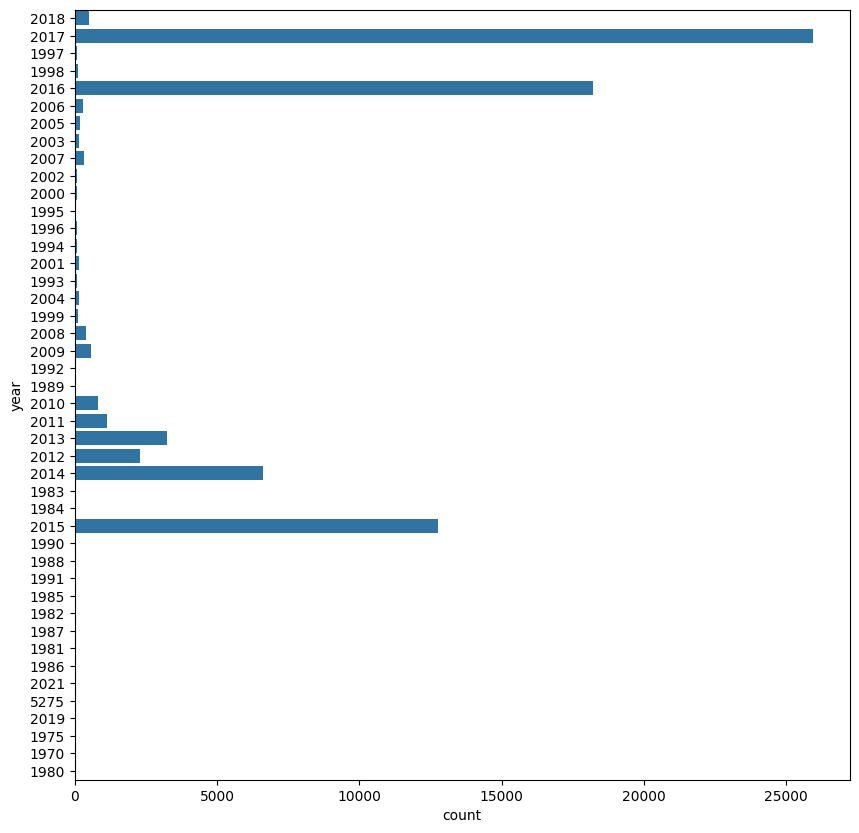

In [54]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_games, y='year', orient='h')
plt.show()

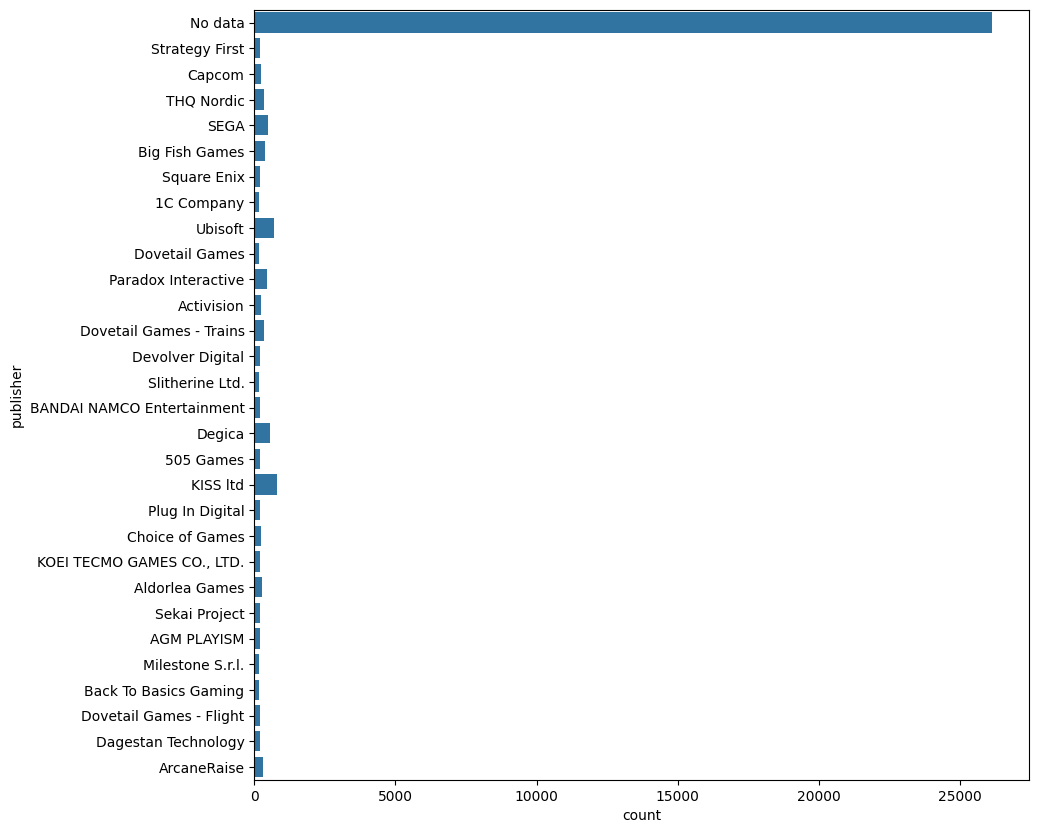

In [47]:
top_publisher = df_games['publisher'].value_counts().head(30).index
df_top_publisher = df_games[df_games['publisher'].isin(top_publisher)]
plt.figure(figsize=(10, 10))
sns.countplot(data=df_top_publisher, y='publisher', orient='h')
plt.show()

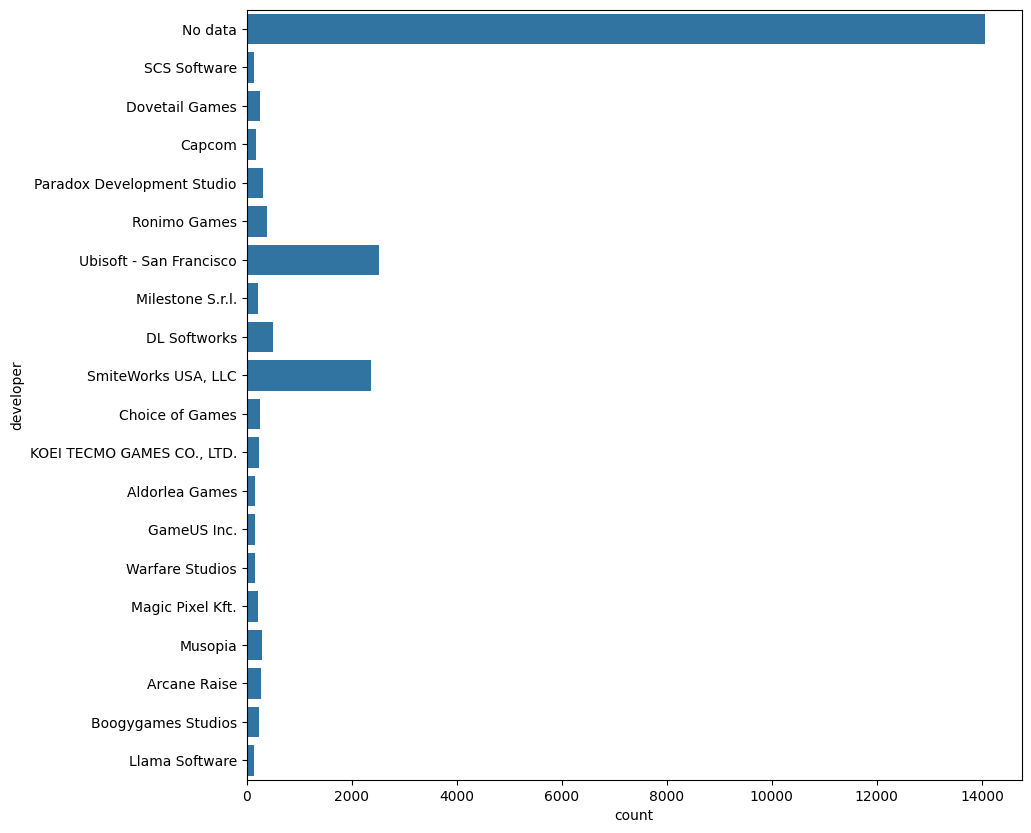

In [48]:
top_dev = df_games['developer'].value_counts().head(20).index
df_dv = df_games[df_games['developer'].isin(top_dev)]
plt.figure(figsize=(10, 10))
sns.countplot(data=df_dv, y='developer', orient='h')
plt.show()

To this model, since we dont want to waste data and publishers and developers tend, a lot of times, to be the same enterprise and, of course for the model would be important the developer and publisher, we are going to unify them in one column

In [49]:
df_games['dev/publisher'] = df_games['developer'].combine_first(df_games['publisher'])
df_games = df_games.drop(['developer', 'publisher'], axis=1)
df_games

,price,early_access,id,genre,app_title,year,dev/publisher
0,4.99,0.0,761140.0,Action,Lost Summoner Kitty,2018,Kotoshiro
1,4.99,0.0,761140.0,Casual,Lost Summoner Kitty,2018,Kotoshiro
2,4.99,0.0,761140.0,Indie,Lost Summoner Kitty,2018,Kotoshiro
3,4.99,0.0,761140.0,Simulation,Lost Summoner Kitty,2018,Kotoshiro
4,4.99,0.0,761140.0,Strategy,Lost Summoner Kitty,2018,Kotoshiro
...,...,...,...,...,...,...,...
85620,4.99,1.0,681550.0,Adventure,Maze Run VR,NaN,No data
85621,4.99,1.0,681550.0,Indie,Maze Run VR,NaN,No data
85622,4.99,1.0,681550.0,Action,Maze Run VR,NaN,No data
85623,4.99,1.0,681550.0,Simulation,Maze Run VR,NaN,No data


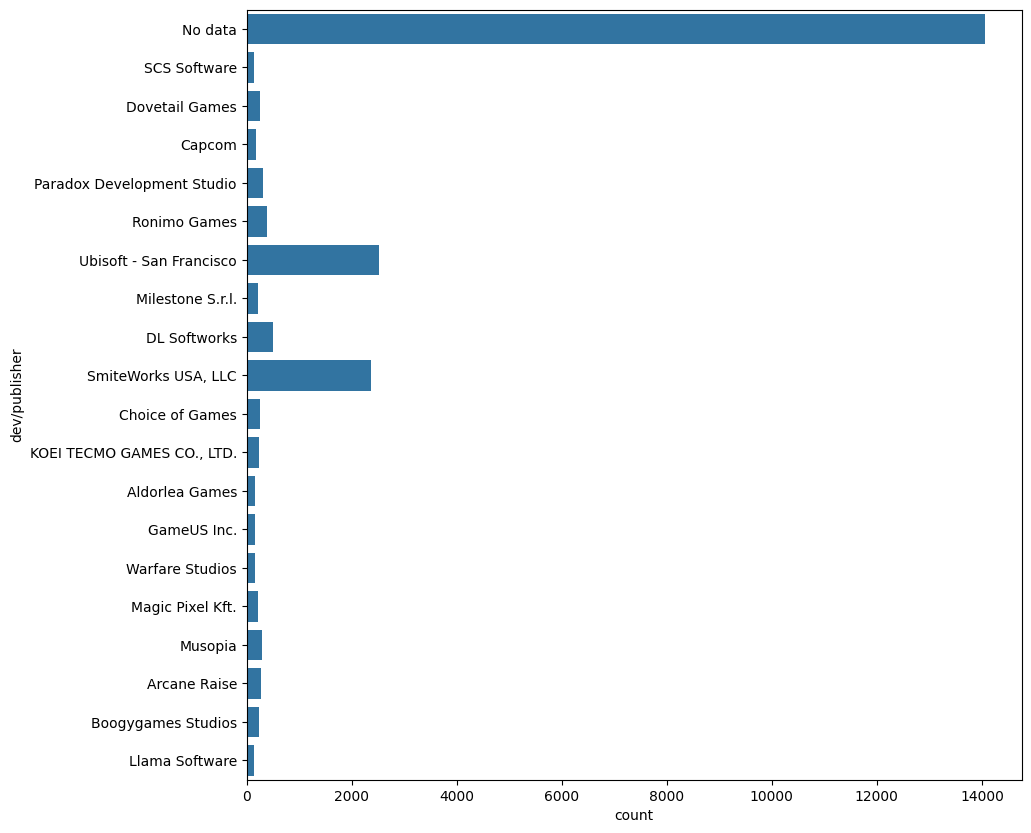

In [56]:
top_dev_pub = df_games['dev/publisher'].value_counts().head(20).index
df_dv_pb = df_games[df_games['dev/publisher'].isin(top_dev_pub)]
plt.figure(figsize=(10, 10))
sns.countplot(data=df_dv_pb, y='dev/publisher', orient='h')
plt.show()

We are dropping the "No data" value can damage the machine learning model and 14000 of 85625 is not a big thing 

In [60]:
mask = df_games["dev/publisher"] != "No data"
df_games = df_games[mask]

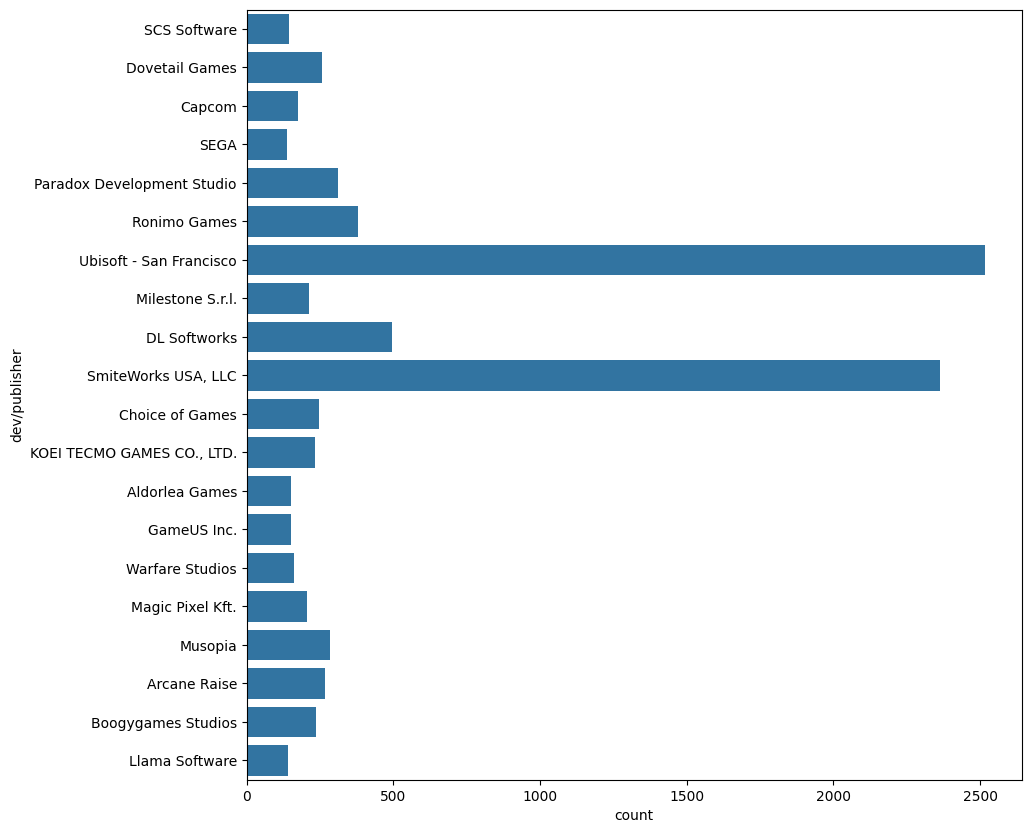

In [61]:
top_dev_pub = df_games['dev/publisher'].value_counts().head(20).index
df_dv_pb = df_games[df_games['dev/publisher'].isin(top_dev_pub)]
plt.figure(figsize=(10, 10))
sns.countplot(data=df_dv_pb, y='dev/publisher', orient='h')
plt.show()

In [62]:
filtered_df = df_games[df_games.apply(lambda row: 'No data' in row.values, axis=1)]
filtered_df

,price,early_access,id,genre,app_title,year,dev/publisher
36,No data,0.0,768800.0,Casual,Race,2018,RewindApp
37,No data,0.0,768800.0,Indie,Race,2018,RewindApp
38,No data,0.0,768800.0,Racing,Race,2018,RewindApp
39,No data,0.0,768800.0,Simulation,Race,2018,RewindApp
40,No data,1.0,768570.0,Action,Uncanny Islands,NaN,Qucheza
...,...,...,...,...,...,...,...
85594,No data,0.0,771810.0,Action,The spy who shot me™,2018,Retro Army Limited
85595,No data,0.0,771810.0,Adventure,The spy who shot me™,2018,Retro Army Limited
85596,No data,0.0,771810.0,Indie,The spy who shot me™,2018,Retro Army Limited
85601,No data,0.0,769330.0,Casual,BAE 2,2018,Riviysky
